<a href="https://colab.research.google.com/github/Dolczi/PytorchTutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [54]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2(n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__() # initiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    # Rectified Linear Unit
    # if input < 0: output = 0
    # else: output
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [55]:
# Pick a manual seed for randomization
torch.manual_seed(47)
# Create an instance of model
model = Model()

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [58]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [59]:
# Change last columns from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

<ipython-input-59-61c94d794727>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [60]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [61]:
# Set X,y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [62]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [65]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [66]:
# Covert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [67]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if error doesn;t go dwon after a bunch of iterations(epochs), lower lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [68]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measute the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 1- epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1396862268447876
Epoch: 10 and loss: 1.0785291194915771
Epoch: 20 and loss: 0.9810279607772827
Epoch: 30 and loss: 0.7993490099906921
Epoch: 40 and loss: 0.6076686382293701
Epoch: 50 and loss: 0.473385214805603
Epoch: 60 and loss: 0.37566250562667847
Epoch: 70 and loss: 0.27839747071266174
Epoch: 80 and loss: 0.18964841961860657
Epoch: 90 and loss: 0.1318349987268448


Text(0.5, 0, 'Epoch')

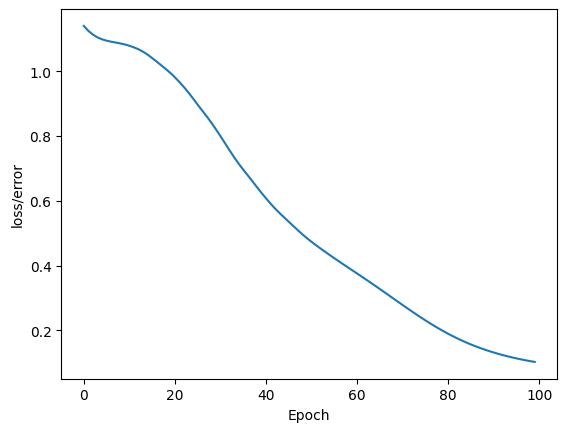

In [69]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [70]:
# Evaluate Model and Test Data Set )validate model on test set)
with torch.no_grad(): # Turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find loss or error

In [71]:
loss

tensor(0.0648)

In [72]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1.) tensor([ 3.2072, -0.6577, -5.5667]) 	 0 	 0
2.) tensor([ 3.2202, -0.7197, -5.5298]) 	 0 	 0
3.) tensor([-1.7340,  3.8507,  0.6723]) 	 1 	 1
4.) tensor([ 3.0888, -0.3440, -5.5602]) 	 0 	 0
5.) tensor([ 3.2144, -0.6919, -5.5464]) 	 0 	 0
6.) tensor([-7.4519,  5.7577, 10.4092]) 	 2 	 2
7.) tensor([-1.5176,  3.7696,  0.3090]) 	 1 	 1
8.) tensor([-6.5174,  5.0254,  9.0610]) 	 2 	 2
9.) tensor([-2.0416,  3.8447,  1.2577]) 	 1 	 1
10.) tensor([ 3.2069, -0.6563, -5.5676]) 	 0 	 0
11.) tensor([-5.2486,  4.8709,  6.7431]) 	 2 	 2
12.) tensor([ 3.1816, -0.5432, -5.6290]) 	 0 	 0
13.) tensor([-1.5927,  3.7724,  0.4494]) 	 1 	 1
14.) tensor([-5.5715,  5.6269,  6.9265]) 	 2 	 2
15.) tensor([-4.2921,  4.3887,  5.2068]) 	 2 	 2
16.) tensor([-6.3748,  5.1936,  8.6909]) 	 2 	 2
17.) tensor([-0.7047,  3.7169, -1.1988]) 	 1 	 1
18.) tensor([ 3.2078, -0.6606, -5.5651]) 	 0 	 0
19.) tensor([ 3.1175, -0.4055, -5.5814]) 	 0 	 0
20.) tensor([ 3.2477, -0.8510, -5.4517]) 	 0 	 0
21.) tensor([-6.7941,  4.9690

In [73]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [74]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 3.2298, -0.7654, -5.5026])


In [75]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [76]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-4.9986,  4.5348,  6.4604])


In [77]:
# Save our NN Model
torch.save(model.state_dict(), "iris_model.pt")

In [80]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<ipython-input-80-7fad3d80c588>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("iris_model.pt"))


<All keys matched successfully>

In [81]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)